## Lecture 2 - Linear regression + Support Vector Modelling

----------------------------------------------------------------------------------------------------------------------------------------------
<a id ="1" > </a>
### 1. Glimpse of the data at hand

In [186]:
# importing important packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

In [187]:
# reading in the CSV 
df = pd.read_csv(r'C:\Users\Sydney\Downloads\fifa_data.csv\fifa_data.csv')

In [188]:
# inspecting first couple rows of data 
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [189]:
# inspect the columns
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [190]:
# further data inspection 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [191]:
# basic statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


<a id="2"></a> 
## 2. Data Cleaning

In [192]:
# checking for NaN values
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

As they are same I am assuming it will be same for other all columns too. 

We will see it soon. 

In [193]:
# dropping columns
#df.drop(df.index[missing_height],inplace =True)

In [194]:
# evaluating NaNs
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

As we can see, we guessed right and now we have fewer null values.

<a id="3"></a>
## 3. Data Analysis

In [195]:
# exploring some more surface-level insights with data
# number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))
print('--'*40)
print("\nEuropean Countries have most players")

Total number of countries : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------

European Countries have most players


In [196]:
#Total number of clubs present and top 5 clubs with highest number of players
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

Total number of clubs : 651
AS Monaco                  33
Real Madrid                33
RC Celta                   33
Wolverhampton Wanderers    33
Atlético Madrid            33
Name: Club, dtype: int64


In [197]:
# player with maximum Potential and Overall Performance -- why not?
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : 231747
Maximum Overall Perforamnce : 158023


<a id="4"></a> <br>
## 4. Exploratory Data Analysis

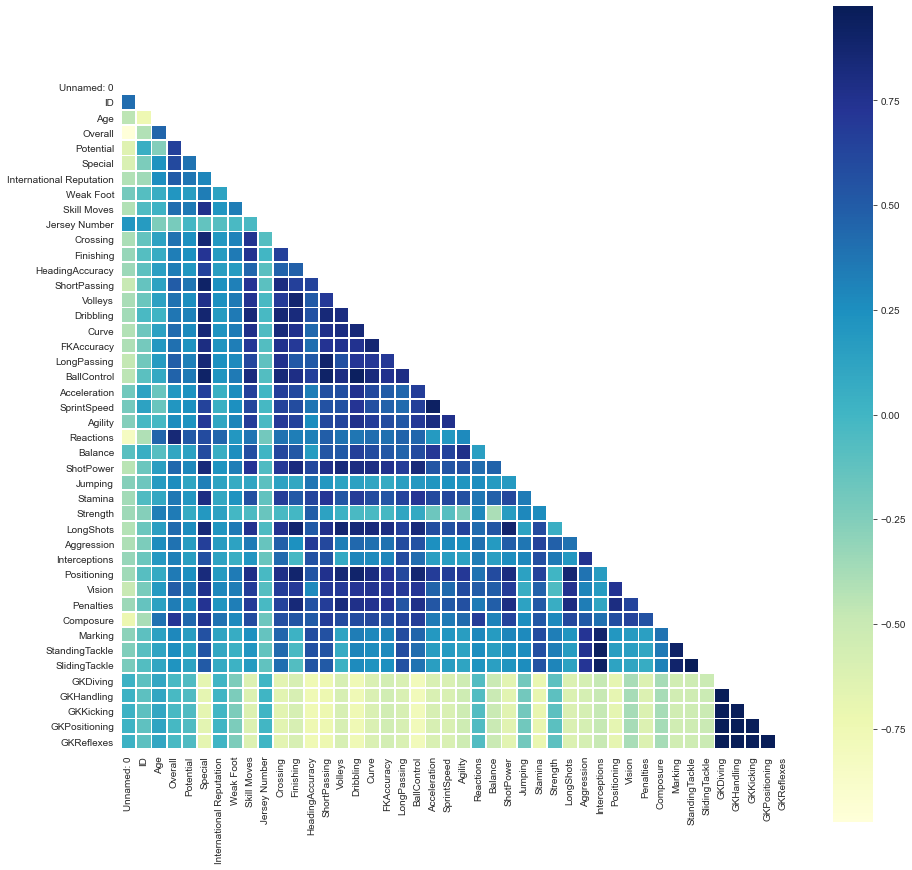

In [198]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

**Lowest correlation** among the goalkeeping side with other columns and high among themselves 

**High correlation** between `Dribbling`, `Volleys`, `Passing` etc...

<a id="5"></a> <br>
## 5. Modelling

In [199]:
# dropping unnecessary values 

drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [200]:
#Turn Real Face into a binary indicator variable
def face_to_num(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
#Turn Preferred Foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

#Create a copy of the original dataframe to avoid indexing errors
df1 = df.copy()

#Apply changes to dataset to create new column
df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

#Split the Work Rate Column in two
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
df1["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
df1["WorkRate2"]= tempwork[1]
#Drop original columns used
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()


,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation,WorkRate1,WorkRate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,11.0,15.0,14.0,8.0,1,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,11.0,15.0,14.0,11.0,1,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,9.0,15.0,15.0,11.0,1,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,85.0,87.0,88.0,94.0,1,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,13.0,5.0,10.0,13.0,1,1,MF,1,High,High


In [201]:
# split ID as a Target value
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

In [202]:
# splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

In [203]:
# One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [204]:
# important piece 
# applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [205]:
# finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9271679383584235
RMSE : 1.8506930547401432


In [206]:
print(y_test.values)

[63 56 69 ... 53 69 69]


Text(0.5, 1.0, 'Linear Prediction of Player Rating')

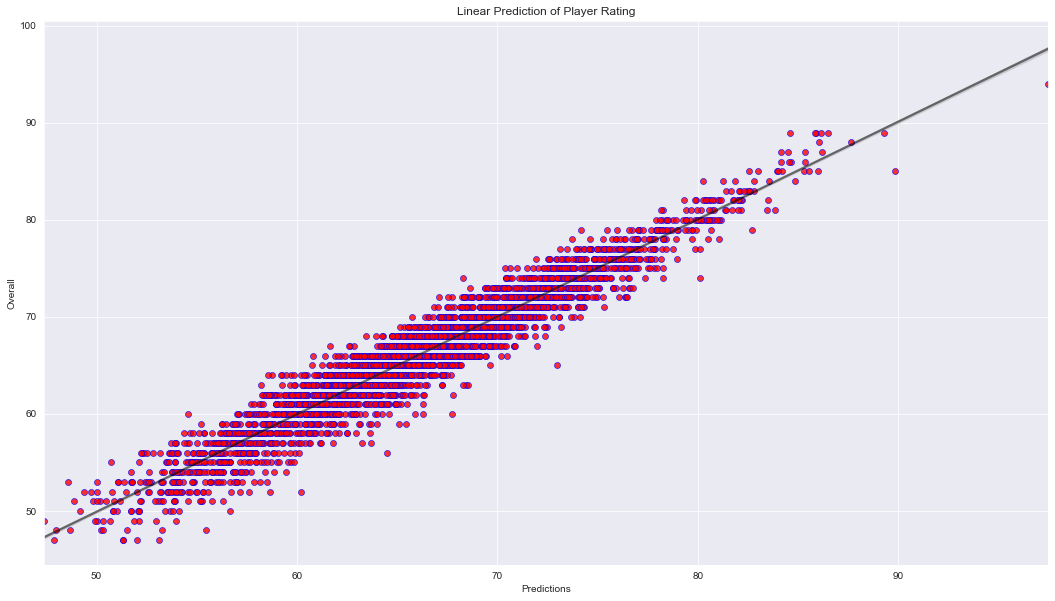

In [207]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test.values,scatter_kws={'color':'red','edgecolor':'blue','linewidth':0.7},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
#plt.show()

In [208]:
model.coef_, model.intercept_

(array([ 4.63046025e-01,  4.79967304e-01,  2.83256424e-01,  2.68631013e-02,
         7.76251244e-01,  3.16594303e-03,  2.22231790e-02,  4.57662544e-02,
         5.01391506e-02, -1.50176451e-03,  1.32535619e-03, -1.39747722e-03,
         2.28538857e-03,  9.99901240e-04,  7.39030579e-02,  2.10109097e-02,
         2.02960511e-02,  1.64500205e-03,  1.54028976e-01, -1.73120002e-02,
         1.47839346e-02,  2.45153705e-03,  3.49580588e-02,  2.85331623e-02,
        -4.23052184e-04,  7.76954236e-04, -1.68698534e-03, -1.98467209e-02,
        -1.06131308e-02, -1.01914390e-02,  3.79901151e-02,  1.32038233e-02,
         1.86094059e-02, -2.36981027e-02,  4.72601583e-02,  4.12898601e-02,
         2.22241452e-02,  2.77071207e-02,  5.55360878e-02,  3.92869866e-01,
        -3.89635565e-02, -2.89998662e-01,  1.21159867e-01,  7.78355871e-01,
        -4.48715644e-01,  2.52037507e-01, -2.46407262e-01, -4.56430339e-01,
        -2.05998593e-01,  3.69748145e-01, -1.63749552e-01, -1.16358470e-01,
         2.6

### Lasso Regression

In [209]:
# applying Lasso for Linear Regression

from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))


Lasso Regression: R^2 score on training set 92.3421784230041
Lasso Regression: R^2 score on test set 91.92190853188055
RMSE : 1.8506930547401432


In [210]:
# coefficients and intercept after application of Lasso 
reg.coef_, reg.intercept_

(array([ 4.43578038e-01,  4.88759018e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.38563204e-02,  0.00000000e+00,  4.35607145e-02,
         3.27183617e-02,  0.00000000e+00,  0.00000000e+00,  1.97785598e-03,
         0.00000000e+00,  0.00000000e+00,  7.02300075e-02,  1.89499515e-02,
         2.21391027e-02,  0.00000000e+00,  1.72877233e-01, -1.16768699e-02,
         7.76372819e-03,  9.87718276e-04,  2.54067620e-02,  3.37292000e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -8.25391879e-03,
        -4.33456400e-04, -0.00000000e+00,  5.48448674e-02,  1.12490663e-02,
         0.00000000e+00,  0.00000000e+00,  4.44685623e-02,  3.30474990e-02,
         1.64611434e-02,  2.22186375e-02,  4.88979119e-02,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.0

In [211]:
df2.columns

Index(['Age', 'Potential', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Real_Face', 'Right_Foot', 'Simple_Position', 'Major_Nation',
       'WorkRate1', 'WorkRate2'],
      dtype='object')

### Ridge Regression

In [212]:
# applying Ridge for Linear Regression

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print('Ridge Regression: R^2 score on training set', ridge.score(X_train, y_train)*100)
print('Ridge Regression: R^2 score on test set', ridge.score(X_test, y_test)*100)
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

Ridge Regression: R^2 score on training set 93.11732095219458
Ridge Regression: R^2 score on test set 92.71686698213799
RMSE : 1.8506930547401432


In [213]:
ridge.coef_, ridge.intercept_

(array([ 4.63052778e-01,  4.79980393e-01,  2.83258821e-01,  2.68415650e-02,
         7.76022314e-01,  3.17978214e-03,  2.22134490e-02,  4.57615572e-02,
         5.01328254e-02, -1.50122609e-03,  1.32510308e-03, -1.39100870e-03,
         2.28564735e-03,  9.99945113e-04,  7.38966763e-02,  2.10073469e-02,
         2.02946337e-02,  1.64215513e-03,  1.54032913e-01, -1.73162750e-02,
         1.47826581e-02,  2.45252747e-03,  3.49533375e-02,  2.85307868e-02,
        -4.25290296e-04,  7.73055415e-04, -1.68498293e-03, -1.98539822e-02,
        -1.06209421e-02, -1.01986871e-02,  3.79959826e-02,  1.32055216e-02,
         1.86111467e-02, -2.36949014e-02,  4.72877983e-02,  4.13146760e-02,
         2.22536309e-02,  2.77222271e-02,  5.55589446e-02,  3.92555566e-01,
        -3.89736393e-02, -2.89883772e-01,  1.22632743e-01,  7.78866884e-01,
        -4.47190412e-01,  2.45055576e-01, -2.44974496e-01, -4.54390295e-01,
        -2.05612845e-01,  3.69223042e-01, -1.63610198e-01, -1.16221360e-01,
         2.6

In [214]:
# important piece 
# applying Linear Regression
model2 = LinearRegression(fit_intercept = False)
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)

# finding the r2 score and root mean squared error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9271679383584233
RMSE : 1.8506930547401448


In [215]:
model2.coef_, model2.intercept_

(array([ 4.63046025e-01,  4.79967304e-01,  2.83256424e-01,  2.68631013e-02,
         7.76251244e-01,  3.16594303e-03,  2.22231790e-02,  4.57662544e-02,
         5.01391506e-02, -1.50176451e-03,  1.32535619e-03, -1.39747722e-03,
         2.28538857e-03,  9.99901240e-04,  7.39030579e-02,  2.10109097e-02,
         2.02960511e-02,  1.64500205e-03,  1.54028976e-01, -1.73120002e-02,
         1.47839346e-02,  2.45153705e-03,  3.49580588e-02,  2.85331623e-02,
        -4.23052184e-04,  7.76954236e-04, -1.68698534e-03, -1.98467209e-02,
        -1.06131308e-02, -1.01914390e-02,  3.79901151e-02,  1.32038233e-02,
         1.86094059e-02, -2.36981027e-02,  4.72601583e-02,  4.12898601e-02,
         2.22241452e-02,  2.77071207e-02,  5.55360878e-02,  3.92869866e-01,
        -3.89635565e-02, -2.89998662e-01, -2.35996331e+00, -1.70276730e+00,
        -2.92983882e+00, -2.22908567e+00, -2.72753044e+00, -2.93755351e+00,
        -5.16824494e+00, -4.59249821e+00, -5.12599590e+00, -5.07860482e+00,
        -4.6

## Support Vector Machine w/ Iris Dataset

In [216]:
# importing sklearn datasets
from sklearn import datasets
from sklearn.datasets import load_iris 

In [217]:
# using sklearn data imports and converting to dataframe
iris = datasets.load_iris() 
x = iris.data
y = iris.target
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['Species'])

In [218]:
target = data['Species'] # creating target variable from 'Species' column of data
# creating set of 'Species' values 
s = set()
for val in target:
    s.add(val)
s = list(s)

In [219]:
# dropping rows with index 1-149 to make it binary classification
rows = list(range(100,150))
df = data.drop(data.index[rows])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


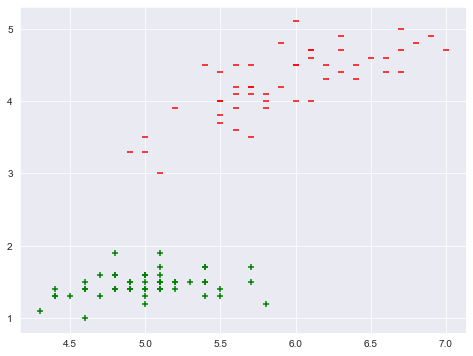

In [220]:
# plotting portions of sesota and versicolor sepal length and petal length in cm --  can you envision a classifying line?

x = df['sepal length (cm)']
y = df['petal length (cm)']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [221]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# drop rest of the features and extract the target values

df = df.drop(['sepal width (cm)','petal width (cm)'],axis=1)

In [222]:
# creating 'Y' list of species, either -1 (originally 0) and 1 (originally 1)
Y = []
target = df['Species']
for val in target:
    if(val == 0):
        Y.append(-1)
    else:
        Y.append(1)  

In [223]:
# drop Species so we can use remaining features
df = df.drop(['Species'],axis=1)

In [224]:
# making 'X' list of remaining features 
X = df.values.tolist()

In [225]:
# shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

# assigning X and Y train and test data 
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

# making all of these into arrays 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# making y_train into a 2D 90 row 1 col array
y_train = y_train.reshape(90,1)

# making y_test into a 2D 10 row 1 col array 
y_test = y_test.reshape(10,1)

In [226]:
# setting up training features with 90 rows each 

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

In [227]:
# α(0.0001) is the learning rate and the regularization parameter λ is set to 1/epochs 
# therefore, the regularizing value reduces the number of epochs increases

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
    print(epochs)
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    epochs += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [228]:
from sklearn.metrics import accuracy_score

# clip the weights 

index = list(range(10,90))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)

# extract the test data features 
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)

In [229]:
# predict 

y_pred = w1 * test_f1 + w2 * test_f2
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print(accuracy_score(y_test,predictions))

1.0


In [230]:
# other way to implement SVM algorithim below -- same accuracy score

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0
